In [ ]:
'''
2/23  0.0.1  ÂÆåÊàêÂü∫Êú¨ËÆ°ÁÆóÊµÅÁ®ã 
2/24  0.0.2  ÂèØËßÜÂåñ‰∏≠Èó¥ÁªìÊûú 
3/17  0.1.0  ÁªìÊûÑÂèòÂåñ=>64m 
3/18  1.0.0  ‰ª£Á†ÅÈáçÊûÑ 
3/25  1.1.0  Êõ¥ÊîπÂäõÊØèÊ¨°ÁßªÂä®‰∏∫0.1m 
3/26  1.1.1  ÂÆûÁé∞zkÊ¥ªËΩΩ 
4/2   2.0.0  ‰ª£Á†ÅÈáçÊûÑ 
4/7   2.1.0  ÊîØÊåÅ160mÊ°• 
4/8   2.2.0  Â¢ûÂä†64m, 160mÊ°•Â≠êÁ±ª 
4/11  2.2.1  ÂÆåÊàêÁñ≤Âä≥„ÄÅÂº∫Â∫¶Ê£ÄÁÆó 
4/12  2.2.2  ÂÆåÊàêÂàöÂ∫¶„ÄÅÊï¥‰ΩìÂ±ÄÈÉ®Á®≥ÂÆöÊÄßÊ£ÄÁÆó 
4/16  2.2.3  ÂÆåÊàêÊà™Èù¢Ë∞ÉËäÇÊ®°Âùó 
'''
'''
TODO:
- get_units_axial_forces_momentÈúÄÊ£ÄÊü•Âíåself.unitsÈ°∫Â∫èÊòØÂê¶ÂØπÂ∫î
- get_one_unit_axial_force_moment‰∏≠get_u_and_v‰∏≠node_numÂ∫îËØ•‰∏éunits.keys()ÊØîËæÉËÄå‰∏çÊòØbc_nodes_nums
- setter => Ëá™Âä®ËÆ°ÁÆó
- reduce_K ‰øÆÊîπ
- Ê∑ªÂä†Checker Á±ª
'''

### ÂØºÂÖ•Ê®°Âùó

In [49]:
%load_ext autoreload
%autoreload 2

from bridge_base import ZkLoad
from bridge import Bridge_64, Bridge_160

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ËæìÂÖ•ÂèÇÊï∞

In [50]:
# Â∏∏Èáè
E = 21 * 10**10           # Êù®Ê∞èÊ®°Èáè (Pa)
P = 1                     # Â§ñÂäõ    (kN)
h = 2.52                  # ÊÅíËΩΩ    (kN)


bottom_chord_length = 8.   # ‰∏ãÂº¶ÊùÜÈïøÂ∫¶/‰∏ãËäÇÁÇπÈó¥Ë∑ù (m)

path = './data/'
bridge_len = 160

if bridge_len == 64:
    bridge = Bridge_64()
    bottom_chord_nodes_nums = [1, 3, 5, 7, 9, 11, 13, 15, 16]  # ‰∏ãÂº¶ÊùÜËäÇÁÇπÁºñÂè∑

elif bridge_len == 160:
    bridge = Bridge_160()
    # [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40]
    bottom_chord_nodes_nums = list(range(1, 40, 2)) + [40]

In [3]:
'''
Ê≠•Èïø = 0.1m

       6.4      0             200    
     ÂùáÂ∏ÉËç∑ËΩΩ   Â°´ÂÖÖ          ÈõÜ‰∏≠Ëç∑ËΩΩ                     ÂùáÂ∏ÉËç∑ËΩΩ
{| | | | | |} . . . {#  .  #  .   #  .  #}  . . .  {| | | | | |}
    Ê°•ÈïøÂ∫¶       0.8    1.6     1.6   1.6       0.8   Ê°•ÈïøÂ∫¶      
'''

uniform_load = [6.4 for i in range(int(bridge.length / 0.1) + 1)] # ÂùáÂ∏ÉËç∑ËΩΩÔºåÊØè‰∏™ÂäõÈó¥Èöî0.1m
padding = [0 for i in range(int(0.8 / 0.1) - 1)] # Â°´ÂÖÖ0

# ÈõÜ‰∏≠Ëç∑ËΩΩÔºåÊØè‰∏™Èó¥Èöî0.8mÔºå‰∏éÂùáÂ∏ÉËç∑ËΩΩÁõ∏Ë∑ù0.8m
conc_load = [200] + padding + [0] + padding + [200] + padding + \
            [0] + padding + [200] + padding + [0] + padding + [200]

load = uniform_load + padding + conc_load + padding + uniform_load

outside_padding = [0 for i in range(int(bridge.length / 0.1) + 1)]
load = outside_padding + load + outside_padding

In [52]:
zk_load = ZkLoad(bridge.length)

### ËΩΩÂÖ•Êï∞ÊçÆ

In [54]:
bridge.load_data(path)
bridge.load_params(E=E, P=P, h=h, 
                   bottom_chord_nodes_nums=bottom_chord_nodes_nums,
                   bottom_chord_length=bottom_chord_length, 
                   load=zk_load)

### ËÆ°ÁÆóÂçïÂÖÉÂàöÂ∫¶Áü©Èòµ

In [55]:
for unit in bridge.units.values():
    print('ÂçïÂÖÉ %d\n%s' % (unit.num, unit.kij))

ÂçïÂÖÉ 1
[[ 2.859e+08  3.931e+08 -2.859e+08 -3.931e+08]
 [ 3.931e+08  5.405e+08 -3.931e+08 -5.405e+08]
 [-2.859e+08 -3.931e+08  2.859e+08  3.931e+08]
 [-3.931e+08 -5.405e+08  3.931e+08  5.405e+08]]
ÂçïÂÖÉ 2
[[ 7.004e+08  0.000e+00 -7.004e+08 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-7.004e+08 -0.000e+00  7.004e+08  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 3
[[ 9.262e-24  1.513e-07 -9.262e-24 -1.513e-07]
 [ 1.513e-07  2.470e+09 -1.513e-07 -2.470e+09]
 [-9.262e-24 -1.513e-07  9.262e-24  1.513e-07]
 [-1.513e-07 -2.470e+09  1.513e-07  2.470e+09]]
ÂçïÂÖÉ 4
[[ 1.111e+09  0.000e+00 -1.111e+09 -0.000e+00]
 [ 0.000e+00  0.000e+00 -0.000e+00 -0.000e+00]
 [-1.111e+09 -0.000e+00  1.111e+09  0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00  0.000e+00]]
ÂçïÂÖÉ 5
[[ 1.425e+08 -1.959e+08 -1.425e+08  1.959e+08]
 [-1.959e+08  2.694e+08  1.959e+08 -2.694e+08]
 [-1.425e+08  1.959e+08  1.425e+08 -1.959e+08]
 [ 1.959e+08 -2.694e+08 -1.959e+08  2.694e+08]]
ÂçïÂÖÉ 6
[

### ÊÄª‰ΩìÂàöÂ∫¶Áü©Èòµ

In [56]:
bridge.K

array([[ 9.862e+08,  3.931e+08, -2.859e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.931e+08,  5.405e+08, -3.931e+08, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-2.859e+08, -3.931e+08,  1.539e+09, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.093e+08,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  8.429e+08,
        -1.959e+08],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00, -1.959e+08,
         2.694e+08]])

In [11]:
bridge.K.shape

(32, 32)

In [6]:
bridge.bottom_chord_nodes_nums

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40]

### ËÆ°ÁÆó‰∏ãÂº¶ÊùÜÁªìÁÇπÁ´ñÂêë‰ΩçÁßª

In [7]:
bridge.get_nodes_vdisps()

ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [14]:
bridge.reduced_K.shape

(29, 29)

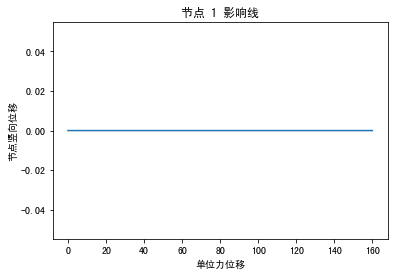

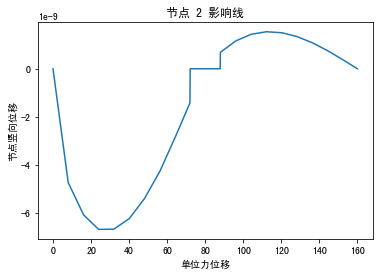

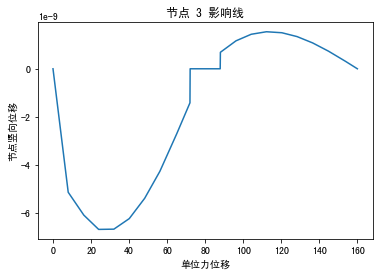

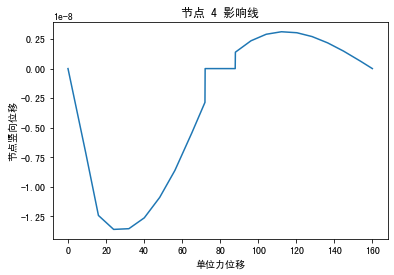

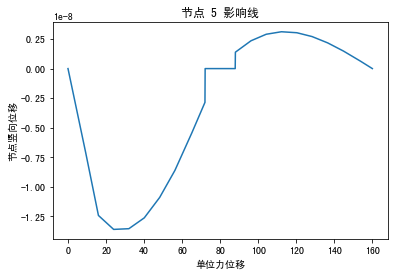

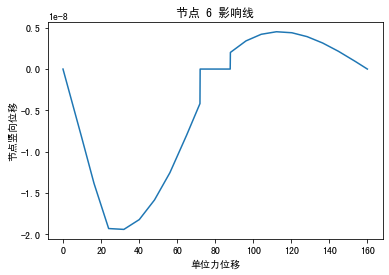

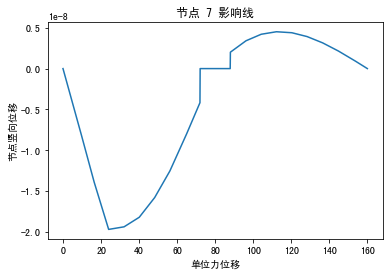

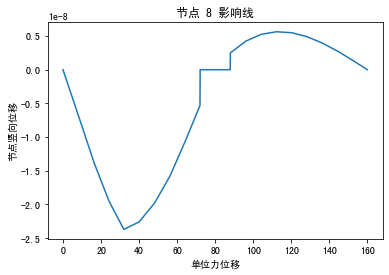

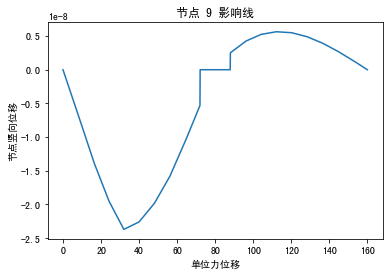

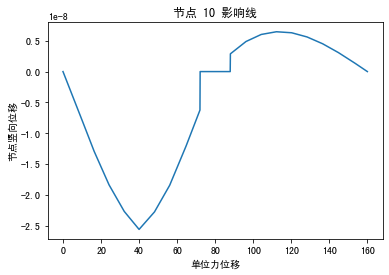

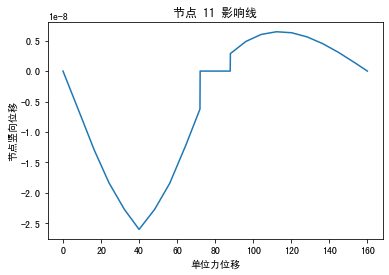

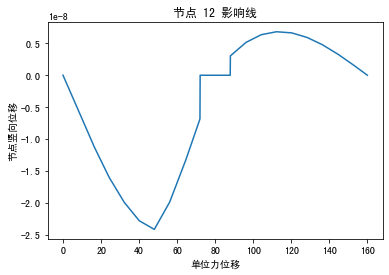

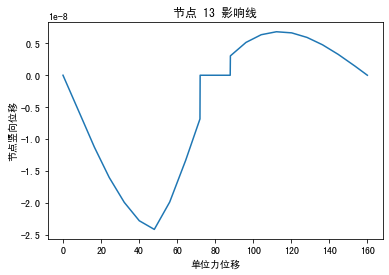

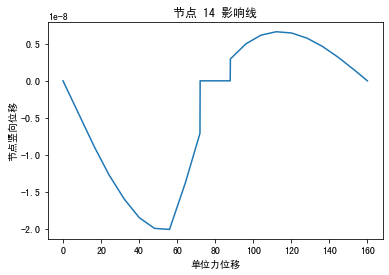

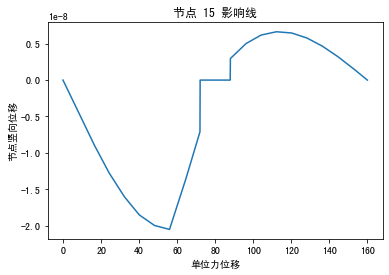

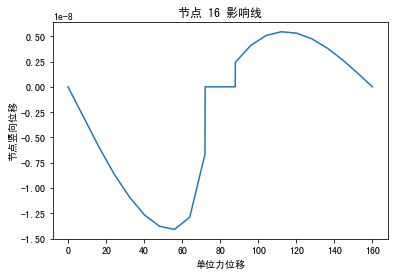

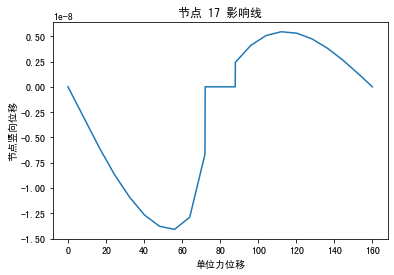

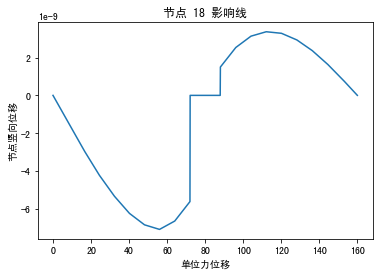

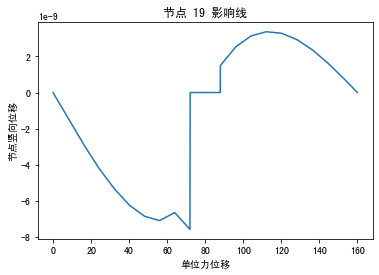

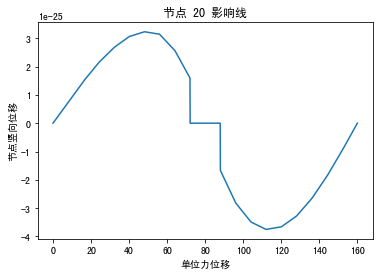

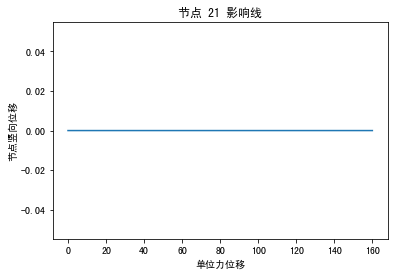

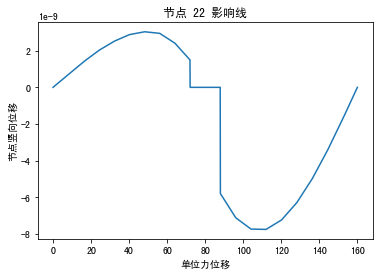

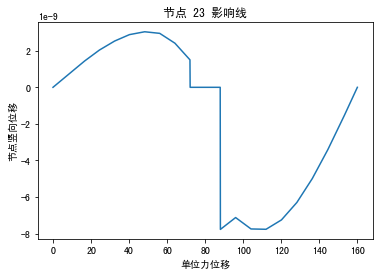

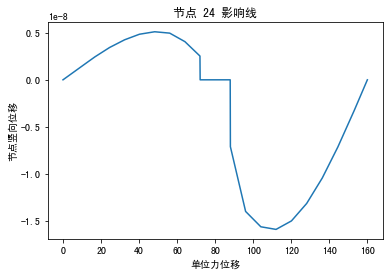

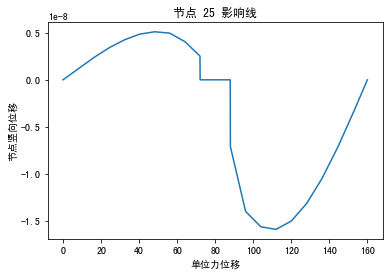

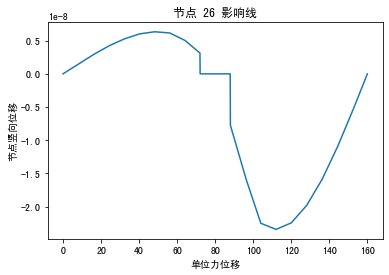

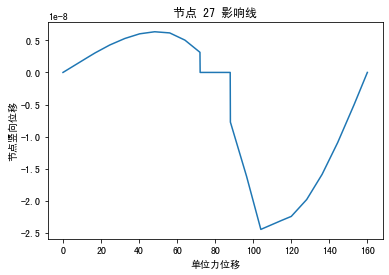

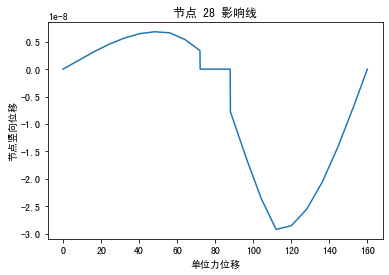

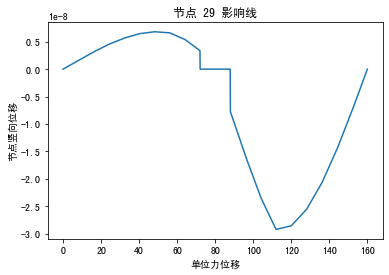

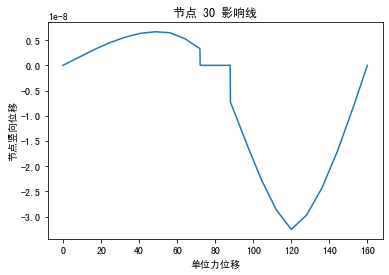

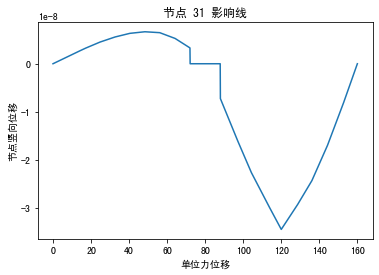

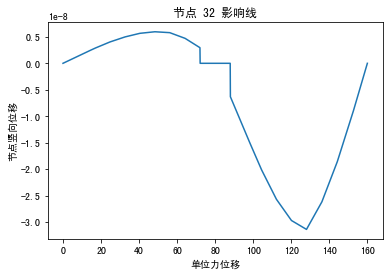

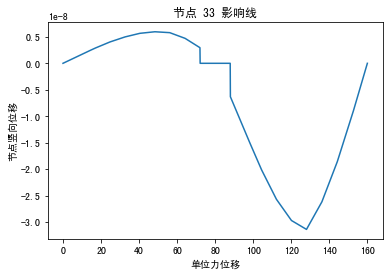

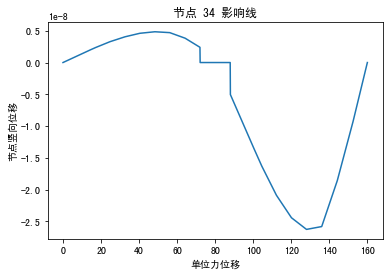

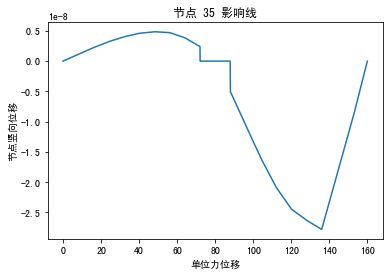

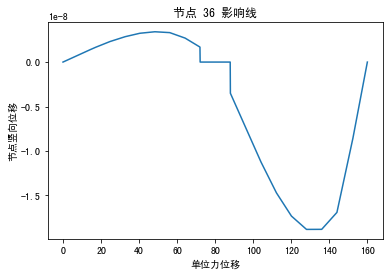

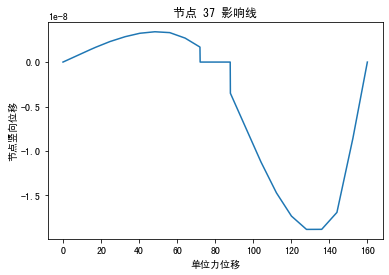

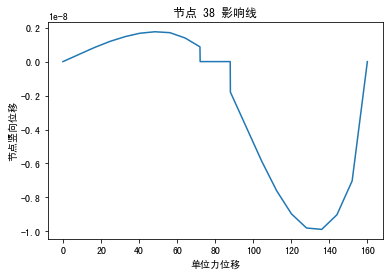

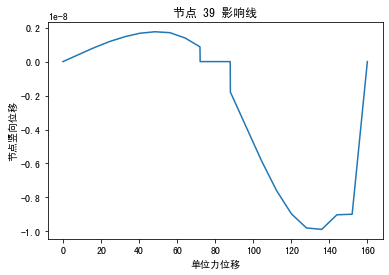

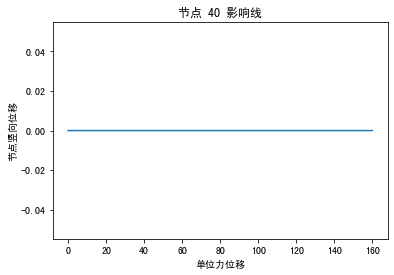

In [11]:
bridge.show_nodes_vdisps()

## ËÆ°ÁÆóËΩ¥Âäõ

In [8]:
bridge.get_units_axial_forces()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.


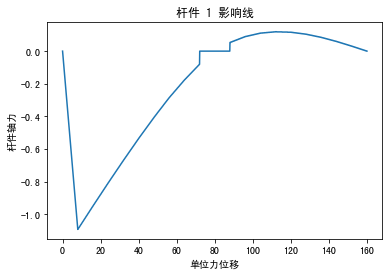

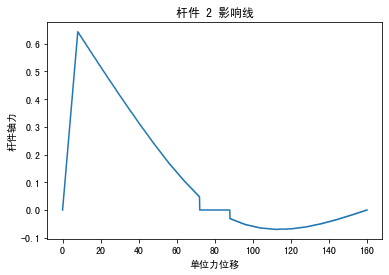

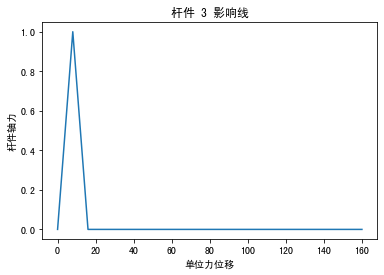

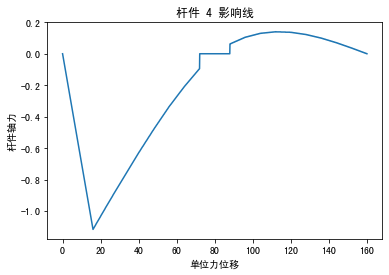

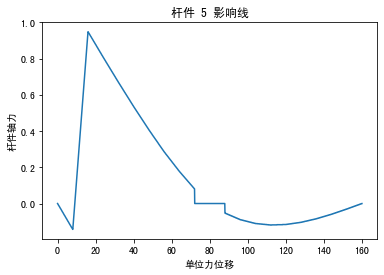

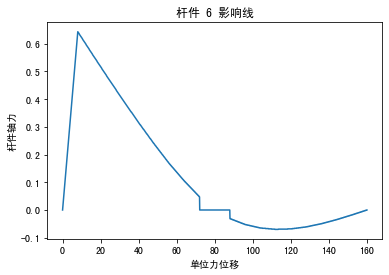

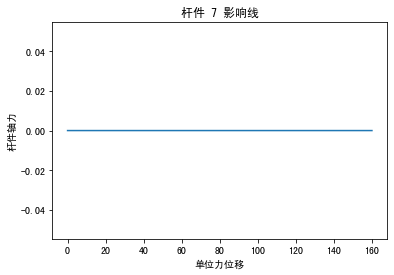

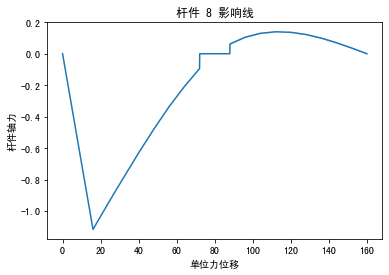

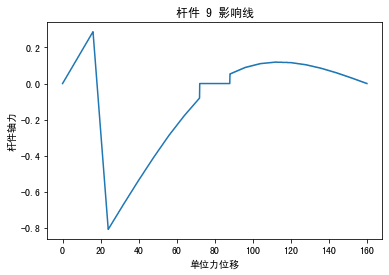

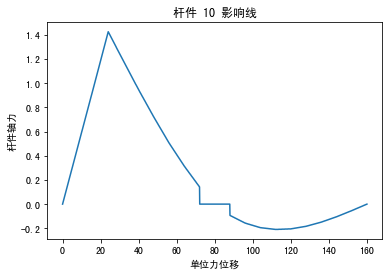

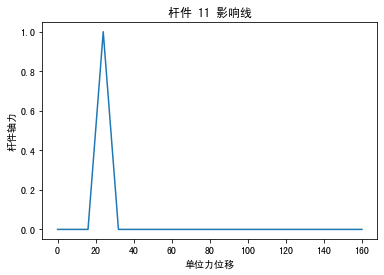

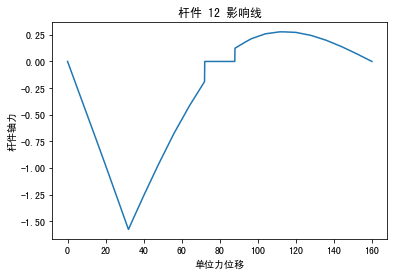

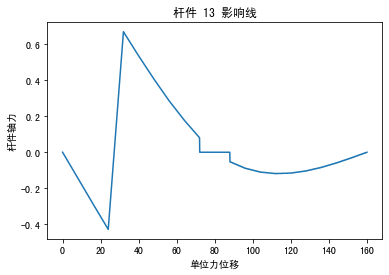

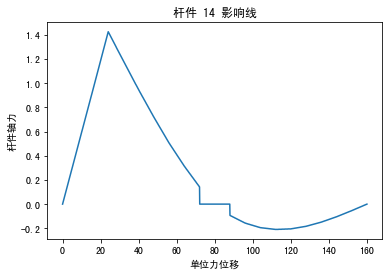

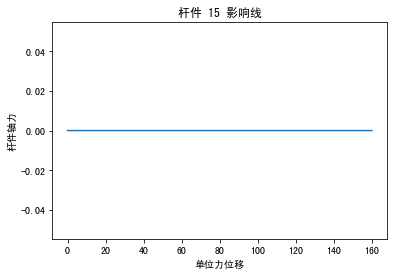

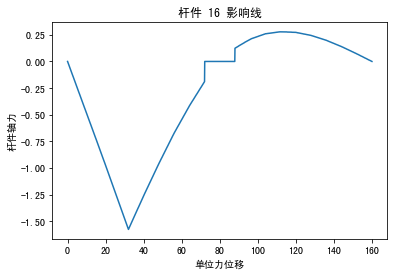

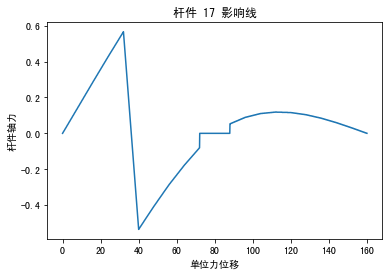

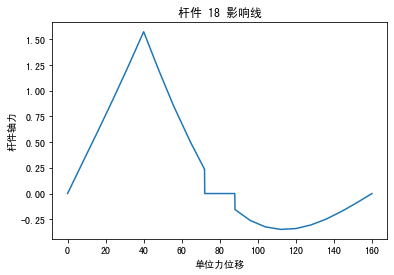

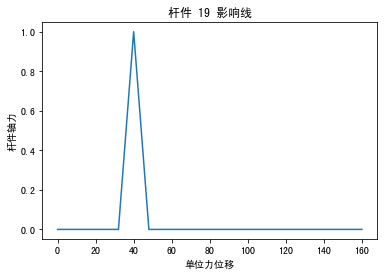

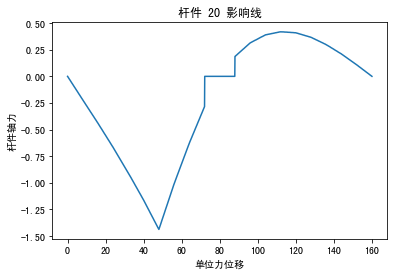

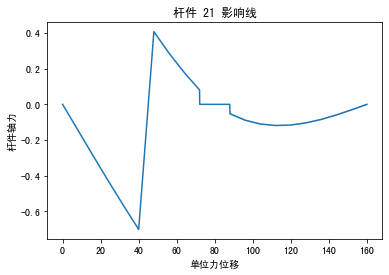

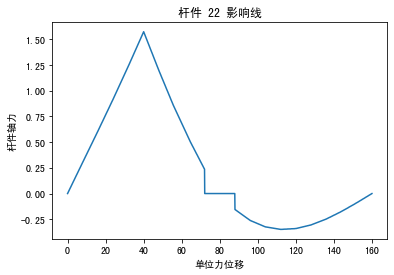

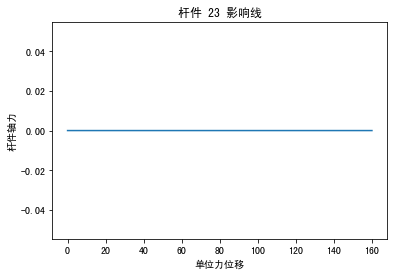

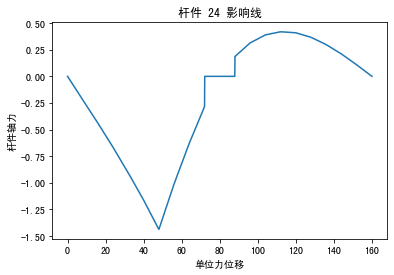

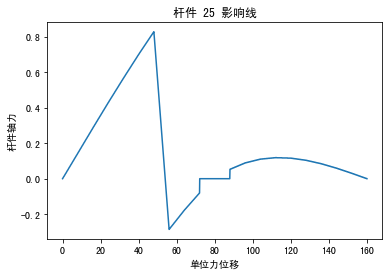

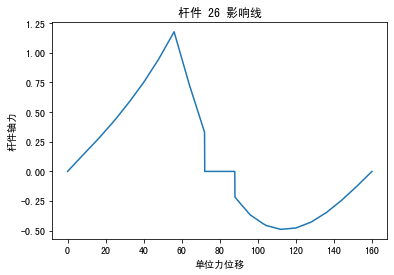

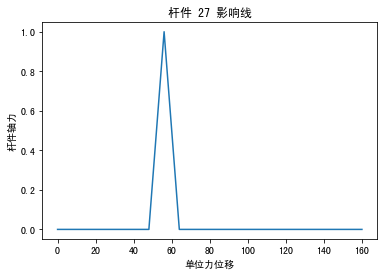

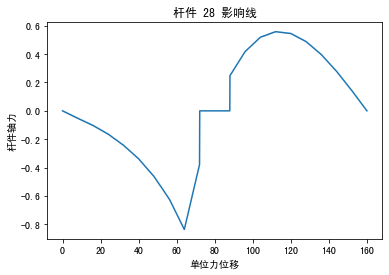

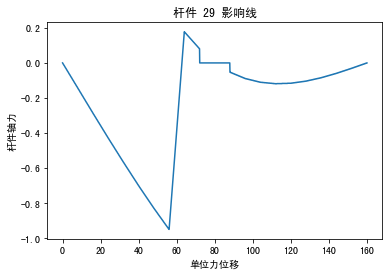

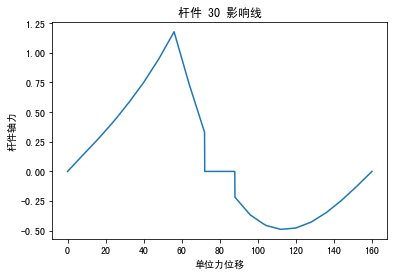

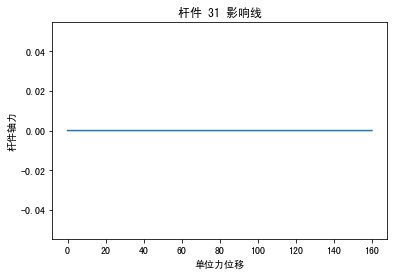

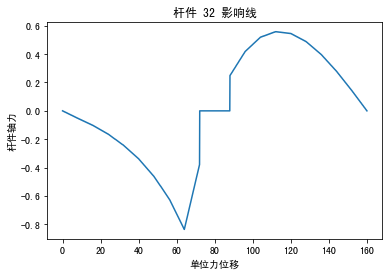

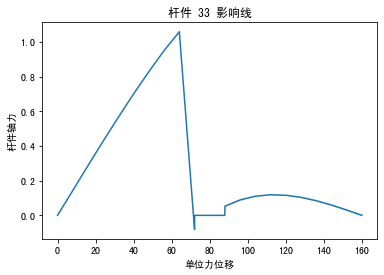

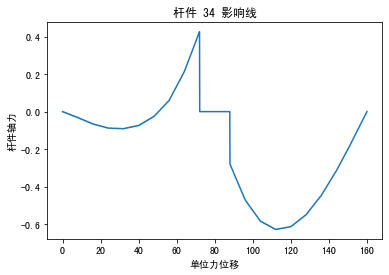

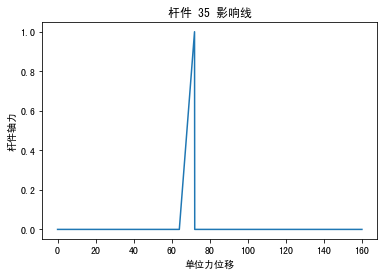

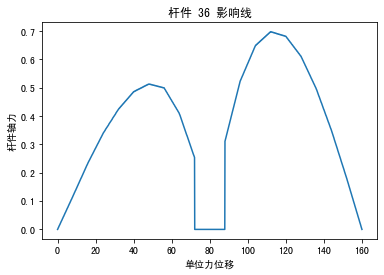

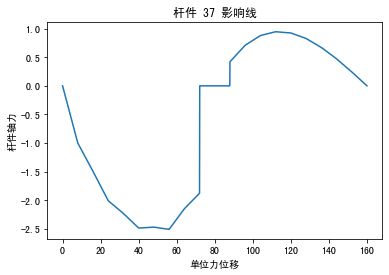

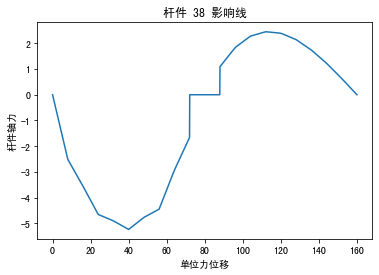

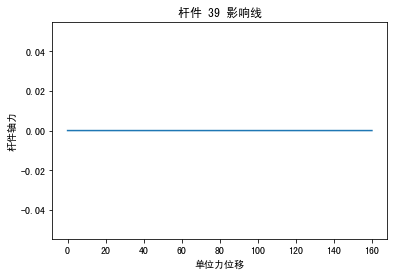

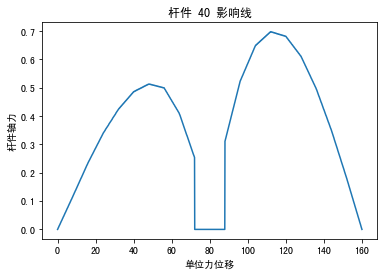

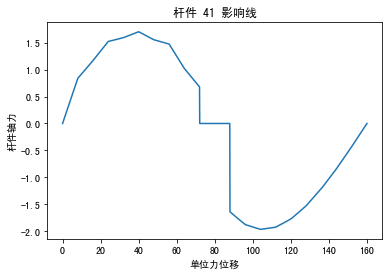

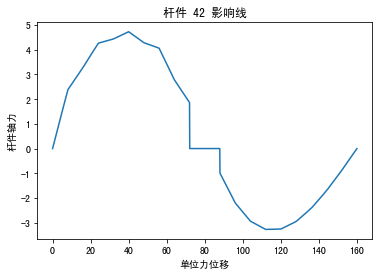

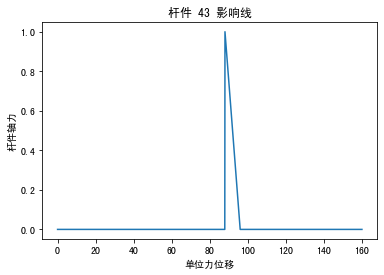

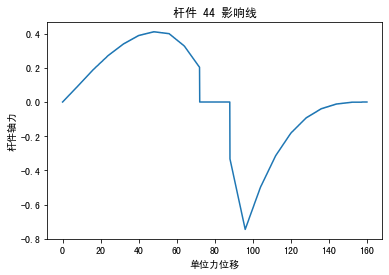

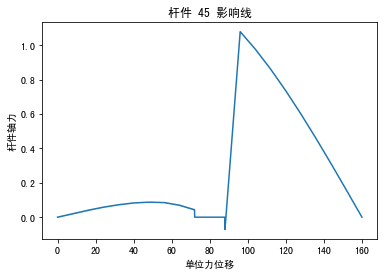

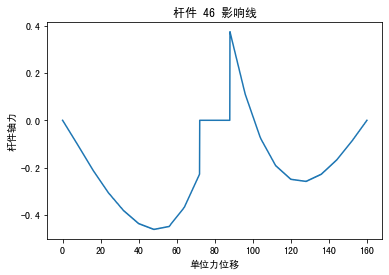

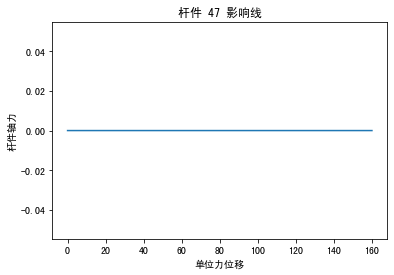

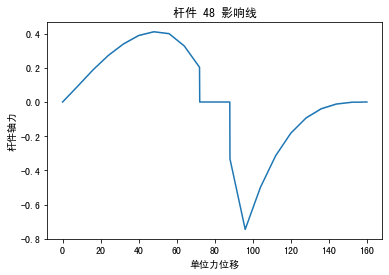

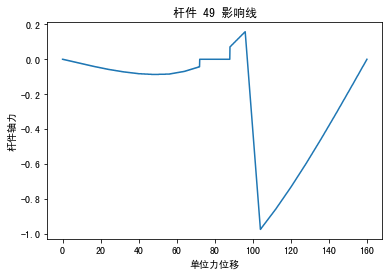

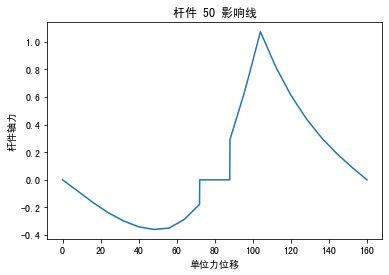

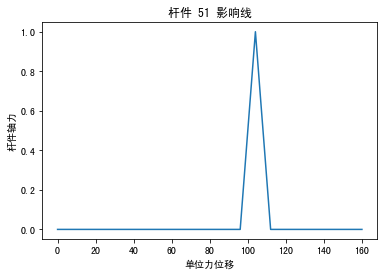

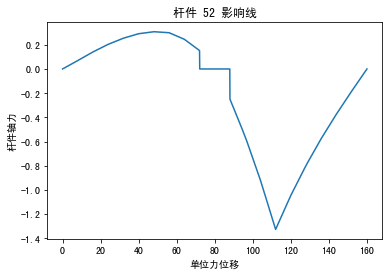

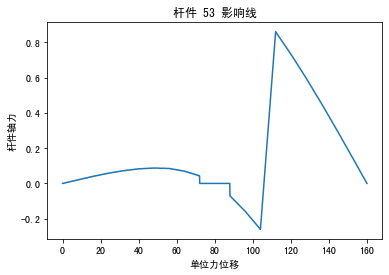

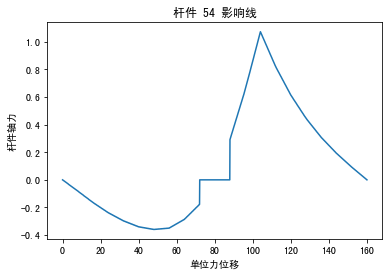

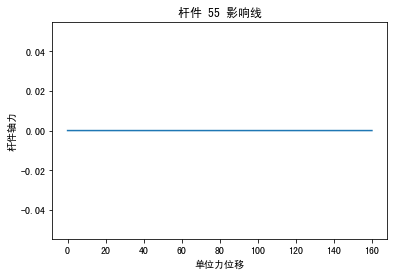

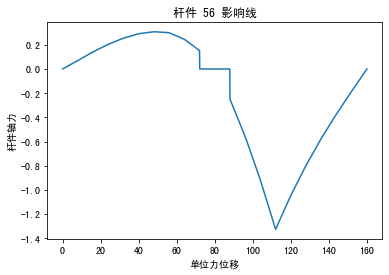

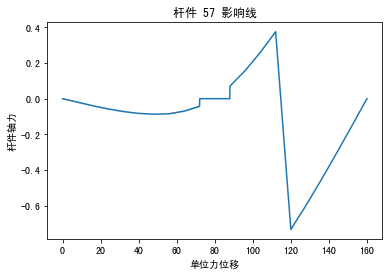

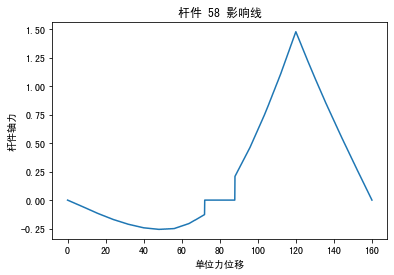

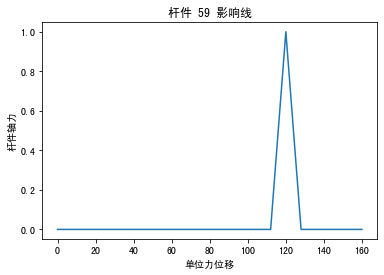

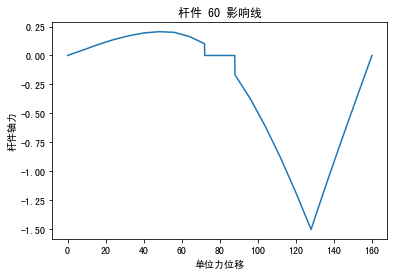

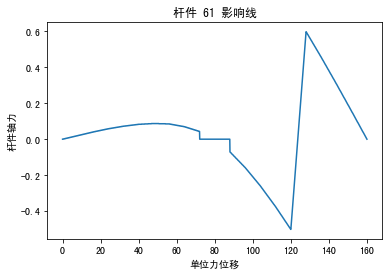

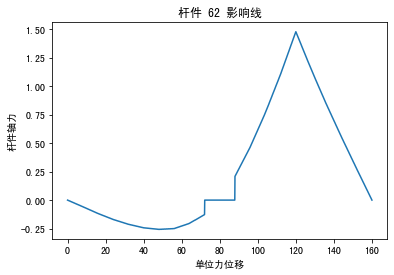

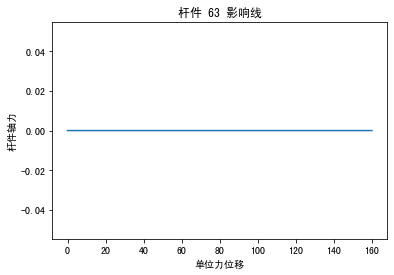

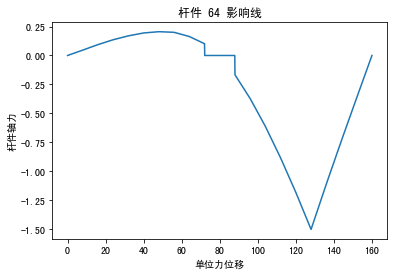

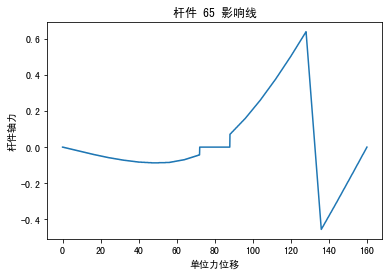

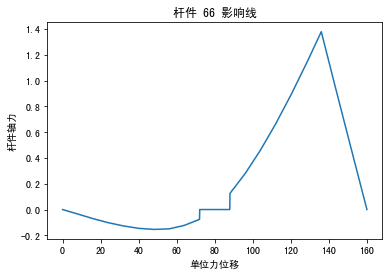

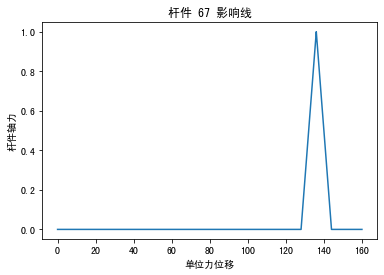

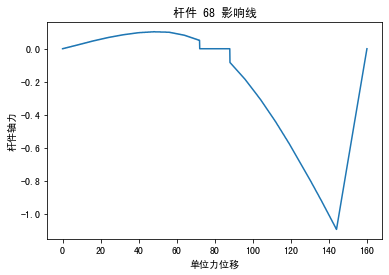

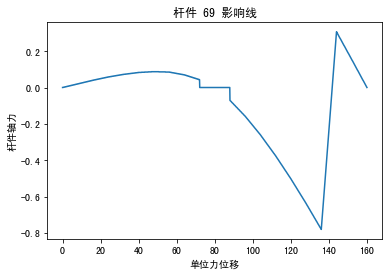

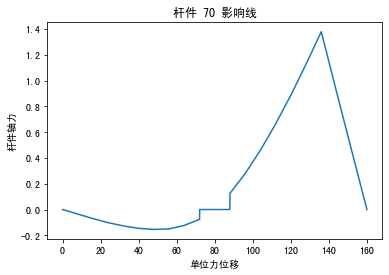

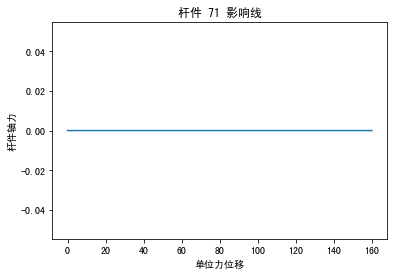

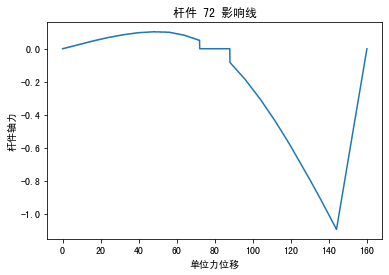

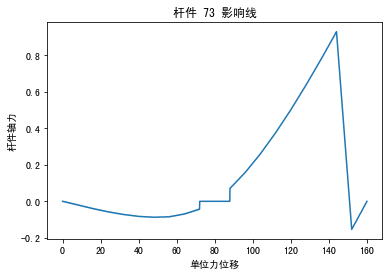

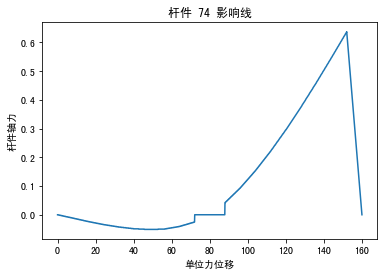

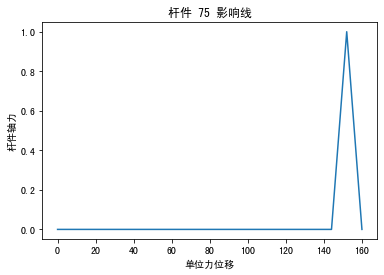

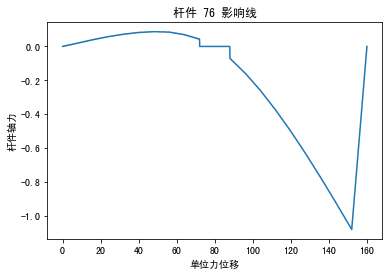

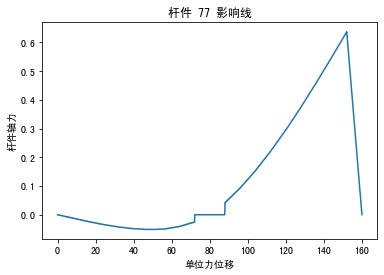

In [20]:
bridge.show_units_axial_forces()

In [9]:
bridge.show_zero_bars()

7 15 23 31 39 47 55 63 71 


## zkÊ¥ªËΩΩ

In [10]:
bridge.get_worst_cases_load()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©Ëç∑ËΩΩÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [23]:
for unit in bridge.units.values():
    print(unit.max_force)

(425.0673112377326, -2962.6164263692735)
(1742.5271330576222, -250.01256207687229)
(833.2800000000018, -6.501082289574755e-12)
(500.02512415373064, -3044.2421732474477)
(2314.268543438919, -466.60865753262397)
(1742.5271330576227, -250.0125620768723)
(2.7628310164743016e-12, -9.682126064451107e-12)
(500.0251241537286, -3044.2421732474404)
(644.1618603708331, -1750.1577179882859)
(3913.4494035242383, -750.0376862306064)
(833.2800000000065, -4.368760240446232e-12)
(1000.0502483074631, -4349.10006161141)
(1269.620730490092, -907.4382278800033)
(3913.449403524237, -750.0376862306064)
(1.3604775609131759e-12, -4.580707181866404e-13)
(1000.0502483074625, -4349.100061611409)
(1249.2039520776166, -870.5864587522665)
(4354.735404583642, -1250.0628103843374)
(833.2800000000125, -6.164454497582898e-12)
(1500.075372461205, -3936.5561256667083)
(550.8275914766807, -1666.3039587234498)
(4354.73540458364, -1250.0628103843374)
(2.0882834471393404e-13, -6.940698670860528e-12)
(1500.075372461206, -3936.

In [11]:
bridge.get_worst_cases_disps()

ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [21]:
bridge.fatigue_check()

Áñ≤Âä≥Ê£ÄÁÆóÂÆåÊàê.


In [22]:
bridge.show_fatigue_check_results()

ÂçïÂÖÉ	ÂêàÊ†º	ÂØå‰ΩôÁéá
 1	ÊòØ	\
 2	ÊòØ	-0.832
 3	ÊòØ	-0.937
 4	ÊòØ	\
 5	ÊòØ	-0.725
 6	ÊòØ	-0.832
 7	ÊòØ	\
 8	ÊòØ	\
 9	ÊòØ	\
10	ÊòØ	-0.765
11	ÊòØ	-0.937
12	ÊòØ	\
13	ÊòØ	-0.725
14	ÊòØ	-0.765
15	ÊòØ	\
16	ÊòØ	\
17	ÊòØ	-0.725
18	ÊòØ	-0.765
19	ÊòØ	-0.937
20	ÊòØ	\
21	ÊòØ	\
22	ÊòØ	-0.765
23	ÊòØ	\
24	ÊòØ	\
25	ÊòØ	-0.725
26	ÊòØ	-0.832
27	ÊòØ	-0.937
28	ÊòØ	\
29	ÊòØ	-0.832


In [32]:
bridge.strength_check()

Âº∫Â∫¶Ê£ÄÁÆóÂÆåÊàê.


In [33]:
bridge.show_strength_check_results()

### Âº∫Â∫¶Ê£ÄÁÆó ###
ÂçïÂÖÉ	ÂêàÊ†º	ÂØå‰ΩôÁéá
 1	ÊòØ	-0.426
 2	ÊòØ	-0.362
 3	ÊòØ	-0.918
 4	ÊòØ	-0.284
 5	ÊòØ	-0.183
 6	ÊòØ	-0.362
 7	ÊòØ	-1.000
 8	ÊòØ	-0.284
 9	ÊòØ	-0.415
10	ÊòØ	-0.103
11	ÊòØ	-0.918
12	ÊòØ	-0.219
13	ÊòØ	-0.606
14	ÊòØ	-0.103
15	ÊòØ	-1.000
16	ÊòØ	-0.219
17	ÊòØ	-0.606
18	ÊòØ	-0.103
19	ÊòØ	-0.918
20	ÊòØ	-0.284
21	ÊòØ	-0.415
22	ÊòØ	-0.103
23	ÊòØ	-1.000
24	ÊòØ	-0.284
25	ÊòØ	-0.183
26	ÊòØ	-0.362
27	ÊòØ	-0.918
28	ÊòØ	-0.426
29	ÊòØ	-0.362


In [51]:
bridge.stiffness_check()

ÂàöÂ∫¶Ê£ÄÁÆóÂÆåÊàê.


In [52]:
bridge.show_stiffness_check_results()

### ÂàöÂ∫¶Ê£ÄÁÆó ###
ÂçïÂÖÉ	ÂêàÊ†º
 1	ÊòØ
 2	ÊòØ
 3	ÊòØ
 4	ÊòØ
 5	ÊòØ
 6	ÊòØ
 7	ÊòØ
 8	ÊòØ
 9	ÊòØ
10	ÊòØ
11	ÊòØ
12	ÊòØ
13	ÊòØ
14	ÊòØ
15	ÊòØ
16	ÊòØ
17	ÊòØ
18	ÊòØ
19	ÊòØ
20	ÊòØ
21	ÊòØ
22	ÊòØ
23	ÊòØ
24	ÊòØ
25	ÊòØ
26	ÊòØ
27	ÊòØ
28	ÊòØ
29	ÊòØ


In [68]:
bridge.overall_stability_check()

Êï¥‰ΩìÁ®≥ÂÆöÊ£ÄÁÆóÂÆåÊàê.


In [69]:
bridge.show_overall_stability_check_results()

### Êï¥‰ΩìÁ®≥ÂÆöÊ£ÄÁÆó ###
ÂçïÂÖÉ	ÂêàÊ†º
 1	ÊòØ
 2	ÊòØ
 3	ÊòØ
 4	ÊòØ
 5	ÊòØ
 6	ÊòØ
 7	ÊòØ
 8	ÊòØ
 9	ÊòØ
10	ÊòØ
11	ÊòØ
12	ÊòØ
13	ÊòØ
14	ÊòØ
15	ÊòØ
16	ÊòØ
17	ÊòØ
18	ÊòØ
19	ÊòØ
20	ÊòØ
21	ÊòØ
22	ÊòØ
23	ÊòØ
24	ÊòØ
25	ÊòØ
26	ÊòØ
27	ÊòØ
28	ÊòØ
29	ÊòØ


In [73]:
bridge.show_check_results(which=2)

### ÂàöÂ∫¶ Ê£ÄÁÆó ###
ÂçïÂÖÉ	ÂêàÊ†º	ÂØå‰ΩôÁéá


AttributeError: 'Unit' object has no attribute 'stiffness_surplus'

In [12]:
units_group = bridge.units_nums
# Ê¢ÅÊà™Èù¢Êï∞ÊçÆ([ËÖπÊùøÂÆΩÂ∫¶ ÁøºÁºòÂéöÂ∫¶ ËÖπÊùøÂéöÂ∫¶ ÁøºÁºòÂÆΩÂ∫¶])
#             b2       t1      t2     b1
b1, t1, b2, t2 = 0.215, 0.012, 0.436, 0.010
beam_section_data = [b1, t1, b2, t2]
bridge.check()
bridge.set_section_params(units_group, beam_section_data)
bridge.update()

ÂΩìÂâç‰øÆÊîπÂèÇÊï∞ÊùÜ‰ª∂ÁªÑÔºö [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
Ê£ÄÁÆó => ÊÄª‰ΩìÂàöÂ∫¶Áü©ÈòµÂ∑≤ÈáçÊñ∞ËÆ°ÁÆó.
Ê£ÄÁÆó => Áº©ÂáèÊÄª‰ΩìÂàöÂ∫¶Áü©ÈòµÂ∑≤ÈáçÊñ∞ËÆ°ÁÆó.
ÊâÄÊúâËäÇÁÇπÁ´ñÂêë‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉËΩ¥ÂäõÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÈõ∂ÊùÜÂ∑≤Ê†áËØÜ.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©Ëç∑ËΩΩÂ∑≤ËÆ°ÁÆóÂÆåÊØï.
ÊâÄÊúâÊùÜ‰ª∂ÂçïÂÖÉÊúÄ‰∏çÂà©‰ΩçÁßªÂ∑≤ËÆ°ÁÆóÂÆåÊØï.


In [25]:
import numpy as np
from sklearn.cluster import KMeans
from collections import OrderedDict
import matplotlib.pyplot as plt

target_units_nums = list(range(1, 40))
target_units_max_forces = [list(bridge.units[unit_num].max_force) for unit_num in target_units_nums]

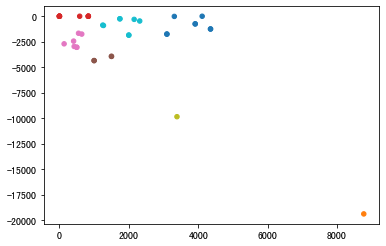

In [28]:
X = np.array(target_units_max_forces)
n_clusters = 7
kmeans = KMeans(n_clusters, max_iter=300, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s=20, c=kmeans, cmap='tab10')

In [29]:
kmeans

array([4, 6, 2, 4, 6, 6, 2, 4, 4, 0, 2, 3, 6, 0, 2, 3, 6, 0, 2, 3, 4, 0,
       2, 3, 6, 0, 2, 6, 4, 0, 2, 6, 0, 4, 2, 0, 5, 1, 2], dtype=int32)

In [32]:
clusters = OrderedDict({label: [] for label in range(n_clusters)})
for unit_num, unit_max_forces, label in zip(target_units_nums, target_units_max_forces, kmeans):
    clusters[label].append(unit_num)
for label, cluster in clusters.items():
    print(label)
    for unit_num in cluster:
        print(unit_num, bridge.units[unit_num].max_force)
    print()

0
10 (3913.4494035242383, -750.0376862306064)
14 (3913.449403524237, -750.0376862306064)
18 (4354.735404583642, -1250.0628103843374)
22 (4354.73540458364, -1250.0628103843374)
26 (3097.497641298115, -1750.0879345380945)
30 (3097.4976412981105, -1750.0879345380931)
33 (3311.500264943061, -16.101299708669345)
36 (4114.076979200166, 0.0)

1
38 (8772.17989547976, -19387.123309477814)

2
3 (833.2800000000018, -6.501082289574755e-12)
7 (2.7628310164743016e-12, -9.682126064451107e-12)
11 (833.2800000000065, -4.368760240446232e-12)
15 (1.3604775609131759e-12, -4.580707181866404e-13)
19 (833.2800000000125, -6.164454497582898e-12)
23 (2.0882834471393404e-13, -6.940698670860528e-12)
27 (833.2800000000198, -6.7030178231463155e-12)
31 (1.6142063450618753e-12, -9.633260911608662e-13)
35 (584.0000000000001, -5.741393520369322e-13)
39 (8.646148801684047e-13, -4.908514831123889e-13)

3
12 (1000.0502483074631, -4349.10006161141)
16 (1000.0502483074625, -4349.100061611409)
20 (1500.075372461205, -3936.55

In [33]:
clusters

OrderedDict([(0, [10, 14, 18, 22, 26, 30, 33, 36]),
             (1, [38]),
             (2, [3, 7, 11, 15, 19, 23, 27, 31, 35, 39]),
             (3, [12, 16, 20, 24]),
             (4, [1, 4, 8, 9, 21, 29, 34]),
             (5, [37]),
             (6, [2, 5, 6, 13, 17, 25, 28, 32])])

In [ ]:
clusters_units_nums[2] += [43, 47, 51, 55, 59, 63, 67, 71, 75]
clusters_units_nums[1] += [42]
clusters_units_nums[5] += [41]
clusters_units_nums[6] += [44, 48, 53, 61, 65, 73, 74, 77]
clusters_units_nums[0] += [40, 45, 50, 54, 58, 62, 66, 70]
clusters_units_nums[3] += [52, 56, 60, 64]
clusters_units_nums[4] += [46, 49, 57, 68, 69, 72, 76]

In [63]:
bh_cases = []
B = [0.46, 0,60, 0.72]
H = [0.44, 0.60, 0.76]
c2_h = 0.44
for b in B:
    for c0_h in H:
        for c1_h in H:
            for c3_h in H:
                for c4_h in H:
                    for c5_h in H:
                        for c6_h in H:
                            # 7 Á±ª
                            # ((b, h), (b, h), ..., (b, h))
                            bh_cases.append(((b, c0_h), (b, c1_h), (b, c2_h), (b, c3_h), 
                                          (b, c4_h), (b, c5_h), (b, c6_h)))
len(bh_cases)

2916

In [ ]:
for bh_case in bh_cases:
    c0_bh, c1_bh, c2_bh, c3_bh, c4_bh, c5_bh, c6_bh = bh_case
    c0_b, c0_h = c1_bh
    c1_b, c1_h = c1_bh
    c2_b, c2_h = c1_bh
    c3_b, c3_h = c1_bh
    c4_b, c4_h = c1_bh
    c5_b, c5_h = c1_bh
    c6_b, c6_h = c1_bh
    for t1 in np.arrange(0.01, b, 0.01):
        b2 = b - 2 * t1
        for in np.arrange()

### ÊµãËØïüëá

In [11]:
print(zip([1, 2], [3, 4]))